# World Happiness Score Prediction Using Machine Learning

- Project Title : World Happiness Score Prediction Using Machine Learning
- Group Number : 65
- Group Members:
    - EG/2021/4599 - Karunarathna J. S.
    - EG/2021/4604 - Karunathilake A. D. H.

# Introduction

- The World Happiness Report is an annual publication that measures the well-being and happiness of people across different countries.
- This dataset is derived from a global survey conducted by Gallup, where individuals are asked to evaluate their quality of life on a scale known as the "Cantril Ladder." 
- The scores range from 0 (the worst possible life) to 10 (the best possible life).
- The report also examines how various factors such as economic production, social support, life expectancy, freedom, generosity, and absence of corruption contribute to happiness across nations.
- In this project, the goal is to build a machine learning model that predicts the happiness score for each country based on these contributing factors.
- Understanding the correlation between these factors and the happiness score can help policymakers and organizations devise strategies to improve the well-being of their citizens.
- By predicting happiness scores accurately, we aim to uncover insights into the factors that drive happiness and assess their relative importance in global well-being.

# Literature Survey
- The concept of measuring happiness on a global scale has gained significant attention from policymakers and researchers over the past decade. The **World Happiness Report**, first published in 2012, has become a major reference for understanding well-being trends globally. The report uses data from Gallup’s World Poll to assess life satisfaction and factors influencing happiness. Each year, economists and psychologists examine these reports to offer guidance on improving well-being through data-driven insights.

- Several studies have explored the relationship between economic and social factors and happiness. For example, *Easterlin (1974)* introduced the **Easterlin Paradox**, which shows that while richer nations tend to report higher happiness scores, there is no clear link between income growth and long-term increases in happiness. More recently, research has turned towards evaluating non-economic factors such as **social support, mental health, and community engagement** as stronger indicators of well-being (*Layard, 2005*).

- Machine learning techniques have also been applied to predict happiness scores, often using models like **linear regression**, **decision trees**, and **random forests**. These models attempt to correlate measurable national indicators, such as GDP per capita or life expectancy, with the reported happiness scores. Studies indicate that while economic factors like GDP per capita have a notable impact, factors like **freedom** and **corruption** play equally crucial roles in explaining variations in happiness across countries (*Helliwell et al., 2020*).

- In this project, by using the World Happiness dataset, we aim to build two machine learning models that captures the relationships between these contributing factors and predicts happiness scores for countries globally.

# Dataset Description
- Link to dataset: https://www.kaggle.com/datasets/unsdsn/world-happiness/data

- The dataset used in this project is sourced from the **World Happiness Report** and includes data for the years 2015 to 2019, covering over 150 countries. It is composed of multiple columns that represent both the happiness score and the contributing factors to each country's score. The primary columns are:

    - **Country**: The name of the country.
    - **Happiness Score**: A score between 0 and 10, representing the average Cantril Ladder score based on survey responses.
    - **GDP per Capita**: The contribution of a country's economic output to its happiness.
    - **Social Support (Family)**: The extent of social support and familial relationships.
    - **Life Expectancy**: The health and longevity of the population.
    - **Freedom**: The freedom individuals feel in making life choices.
    - **Generosity**: The perceived generosity in the country.
    - **Trust (Government Corruption)**: The level of trust in the government and perceptions of corruption.
    - **Dystopia Residual**: A metric combining a hypothetical "Dystopia" score and residual errors from the model. It helps to establish a lower-bound reference for the happiness score.

### Dataset Fields:
| Column Name           | Description                                                                 |
|-----------------------|-----------------------------------------------------------------------------|
| **Country**            | Name of the country                                                         |
| **Happiness Score**    | The Cantril ladder score for the country (0 to 10)                           |
| **GDP per Capita**     | The economic contribution to happiness                                      |
| **Family**             | Represents social support within the country                                |
| **Life Expectancy**    | Health metric based on average life expectancy                              |
| **Freedom**            | The perceived freedom to make life choices                                  |
| **Generosity**         | The country's generosity as measured by charitable giving                   |
| **Trust (Government Corruption)** | Perceptions of corruption in the government                      |
| **Dystopia Residual**  | The unexplained component of the happiness score, using Dystopia as a base   |

- The happiness score is calculated as the sum of these contributing factors, and it represents a holistic assessment of a nation’s happiness. Each factor quantifies the impact of different social, economic, and health-related aspects on the overall happiness of a country’s citizens.

- This dataset provides an excellent opportunity to explore the relationships between these factors using machine learning models to predict happiness scores. 

#  Exploratory Data Analysis

### Import Libraries
- For visualization and statistics, first we import necessary libraries as shown below.

In [1]:
# For visualization and statistics we first import necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Import Dataframes and Inspect the features
- Next we import datasets from all 5 years into pandas dataframes separately.

In [2]:
# Load datasets from 2015 to 2019
df_2015 = pd.read_csv("2015.csv")
df_2016 = pd.read_csv("2016.csv")
df_2017 = pd.read_csv("2017.csv")
df_2018 = pd.read_csv("2018.csv")
df_2019 = pd.read_csv("2019.csv")

# Print columns of each dataframe to inspect the features
print("2015 Dataset Columns: ", df_2015.columns)
print("2016 Dataset Columns: ", df_2016.columns)
print("2017 Dataset Columns: ", df_2017.columns)
print("2018 Dataset Columns: ", df_2018.columns)
print("2019 Dataset Columns: ", df_2019.columns)


2015 Dataset Columns:  Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
2016 Dataset Columns:  Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
2017 Dataset Columns:  Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')
2018 Dataset Columns:  Index(['Overall rank', 'Country or region'

# Data Preprocessing
1. Change column names into one format

In [3]:
# Rename columns for 2015 dataset
df_2015.rename(columns={
    'Country': 'Country or region', 
    'Happiness Score': 'Score', 
    'Economy (GDP per Capita)': 'GDP per capita',
    'Family': 'Social support',
    'Health (Life Expectancy)': 'Healthy life expectancy',
    'Trust (Government Corruption)': 'Perceptions of corruption',
    'Freedom' : 'Freedom to make life choices'
}, inplace=True)

# Rename columns for 2016 dataset
df_2016.rename(columns={
    'Country': 'Country or region', 
    'Happiness Score': 'Score', 
    'Economy (GDP per Capita)': 'GDP per capita',
    'Family': 'Social support',
    'Health (Life Expectancy)': 'Healthy life expectancy',
    'Trust (Government Corruption)': 'Perceptions of corruption',
    'Freedom' : 'Freedom to make life choices'
}, inplace=True)

# Rename columns for 2017 dataset
df_2017.rename(columns={
    'Country': 'Country or region', 
    'Happiness.Score': 'Score', 
    'Economy..GDP.per.Capita.': 'GDP per capita',
    'Family': 'Social support',
    'Health..Life.Expectancy.': 'Healthy life expectancy',
    'Trust..Government.Corruption.': 'Perceptions of corruption',
    'Freedom' : 'Freedom to make life choices',
    'Dystopia.Residual': 'Dystopia Residual'
}, inplace=True)

# No need to rename 2018 and 2019 datasets because they already have consistent columns

# Print out the column names again to confirm consistency
print("2015 Dataset Columns: ", df_2015.columns)
print("2016 Dataset Columns: ", df_2016.columns)
print("2017 Dataset Columns: ", df_2017.columns)
print("2018 Dataset Columns: ", df_2018.columns)
print("2019 Dataset Columns: ", df_2019.columns)


2015 Dataset Columns:  Index(['Country or region', 'Region', 'Happiness Rank', 'Score',
       'Standard Error', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices',
       'Perceptions of corruption', 'Generosity', 'Dystopia Residual'],
      dtype='object')
2016 Dataset Columns:  Index(['Country or region', 'Region', 'Happiness Rank', 'Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Perceptions of corruption',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
2017 Dataset Columns:  Index(['Country or region', 'Happiness.Rank', 'Score', 'Whisker.high',
       'Whisker.low', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia Residual'],
      dtype='object')
2018 Dataset Columns:  

2. Drop the unnecessary columns from relevant years of datasets

In [4]:
# Drop unnecessary columns from 2015 dataset
df_2015.drop(columns=['Happiness Rank','Region', 'Standard Error'], inplace=True)

# Drop unnecessary columns from 2016 dataset
df_2016.drop(columns=['Happiness Rank','Region','Lower Confidence Interval', 'Upper Confidence Interval'], inplace=True)

# Drop unnecessary columns from 2017 dataset
df_2017.drop(columns=['Happiness.Rank','Whisker.high', 'Whisker.low'], inplace=True)

# Drop unwanted columns in 2018 and 2019
df_2018.drop(columns=['Overall rank'], inplace=True)
df_2019.drop(columns=['Overall rank'], inplace=True)


In [5]:
# Print out the column names again to confirm consistency
print("2015 Dataset Columns: ", df_2015.columns)
print("2016 Dataset Columns: ", df_2016.columns)
print("2017 Dataset Columns: ", df_2017.columns)
print("2018 Dataset Columns: ", df_2018.columns)
print("2019 Dataset Columns: ", df_2019.columns)

2015 Dataset Columns:  Index(['Country or region', 'Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices',
       'Perceptions of corruption', 'Generosity', 'Dystopia Residual'],
      dtype='object')
2016 Dataset Columns:  Index(['Country or region', 'Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices',
       'Perceptions of corruption', 'Generosity', 'Dystopia Residual'],
      dtype='object')
2017 Dataset Columns:  Index(['Country or region', 'Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia Residual'],
      dtype='object')
2018 Dataset Columns:  Index(['Country or region', 'Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object

3. Because one year only have limited datapoints, we preprocess all 5 years and merge into one dataframe.

In [6]:
# Merge all datasets
df_combined = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019])

# Reset index after merging
df_combined.reset_index(drop=True, inplace=True)

# Check the shape and first few rows of the combined dataset
print("Combined Dataset Shape:", df_combined.shape)
print(df_combined.head())


Combined Dataset Shape: (782, 9)
  Country or region  Score  GDP per capita  Social support  \
0       Switzerland  7.587         1.39651         1.34951   
1           Iceland  7.561         1.30232         1.40223   
2           Denmark  7.527         1.32548         1.36058   
3            Norway  7.522         1.45900         1.33095   
4            Canada  7.427         1.32629         1.32261   

   Healthy life expectancy  Freedom to make life choices  \
0                  0.94143                       0.66557   
1                  0.94784                       0.62877   
2                  0.87464                       0.64938   
3                  0.88521                       0.66973   
4                  0.90563                       0.63297   

   Perceptions of corruption  Generosity  Dystopia Residual  
0                    0.41978     0.29678            2.51738  
1                    0.14145     0.43630            2.70201  
2                    0.48357     0.34139       

4. Random forest algorithm doesn't take null values, therefore before train test split we checked for null values to handle them gracefully.

In [7]:
# Check for null values and handle them gracefully
print("Missing Values in Each Column:")
print(df_combined.isnull().sum())


Missing Values in Each Column:
Country or region                 0
Score                             0
GDP per capita                    0
Social support                    0
Healthy life expectancy           0
Freedom to make life choices      0
Perceptions of corruption         1
Generosity                        0
Dystopia Residual               312
dtype: int64


Now we can see that there is one missing value in the Perceptions of Corruption and there are 312 missing values in the Dystopia Residuals. 
- Since Dystopia residuals have 312 missing values out of 782 we can use median imputation
- Perceptions of corruption is missing only one value. so we can either drop the row or we can use mean or median imputation

In [8]:
# Impute missing values in `Dystopia Residual` using median
df_combined['Dystopia Residual'] = df_combined['Dystopia Residual'].fillna(df_combined['Dystopia Residual'].median())

# Impute missing value in `Perceptions of corruption` using mean
df_combined['Perceptions of corruption'] = df_combined['Perceptions of corruption'].fillna(df_combined['Perceptions of corruption'].mean())


In [9]:
# Confirm that there are no remaining missing values
print("Missing Values After Imputation:")
print(df_combined.isnull().sum())


Missing Values After Imputation:
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Perceptions of corruption       0
Generosity                      0
Dystopia Residual               0
dtype: int64


## Train Test Split
1. After merging and handling null values we have splitted the dataset in to 2 parts as 80% of the data for training and 20% of the data for testing.

In [10]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df_combined.drop(columns=['Score', 'Country or region'])  # Drop target and identifier columns
y = df_combined['Score']  # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)


Training Set Shape: (625, 7)
Testing Set Shape: (157, 7)


### Descriptive Statistics
- Get general information about mean, median and variance

In [11]:
# Display summary statistics for numerical features in training set
print("Summary Statistics (Training Set):")
print(X_train.describe())


Summary Statistics (Training Set):
       GDP per capita  Social support  Healthy life expectancy  \
count      625.000000      625.000000               625.000000   
mean         0.910964        1.079505                 0.608729   
std          0.413631        0.327203                 0.247087   
min          0.000000        0.000000                 0.000000   
25%          0.595430        0.868351                 0.438730   
50%          0.979000        1.125000                 0.644250   
75%          1.238000        1.321000                 0.798951   
max          2.096000        1.644000                 1.141000   

       Freedom to make life choices  Perceptions of corruption  Generosity  \
count                    625.000000                 625.000000  625.000000   
mean                       0.413035                   0.126740    0.221743   
std                        0.153262                   0.106486    0.124924   
min                        0.000000                   0.00

### Visualizing the data

#### Distribution of features

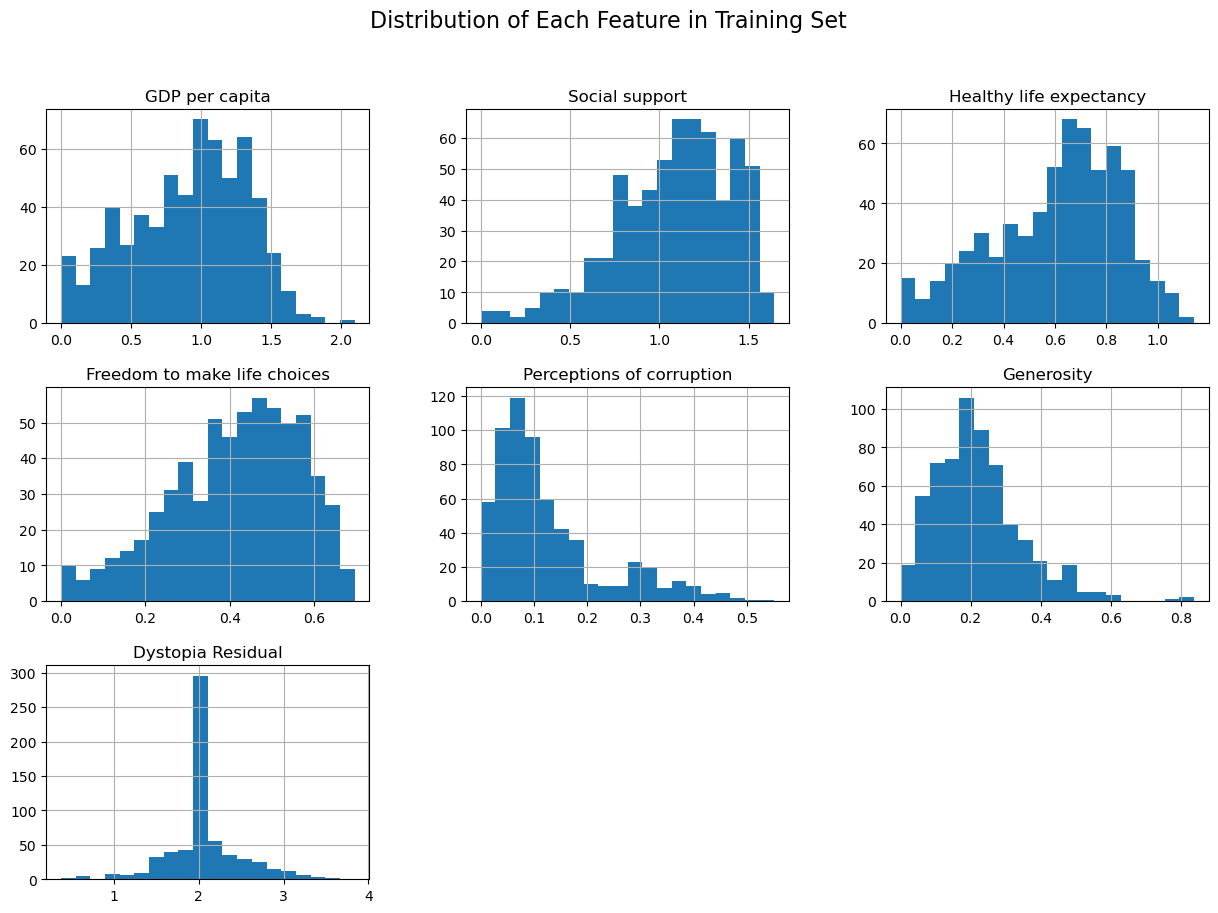

In [12]:
# Plot histograms for each numerical column in the training set
X_train.hist(bins=20, figsize=(15,10))
plt.suptitle("Distribution of Each Feature in Training Set", fontsize=16)
plt.show()


#### Box Plot for Outlier Detection

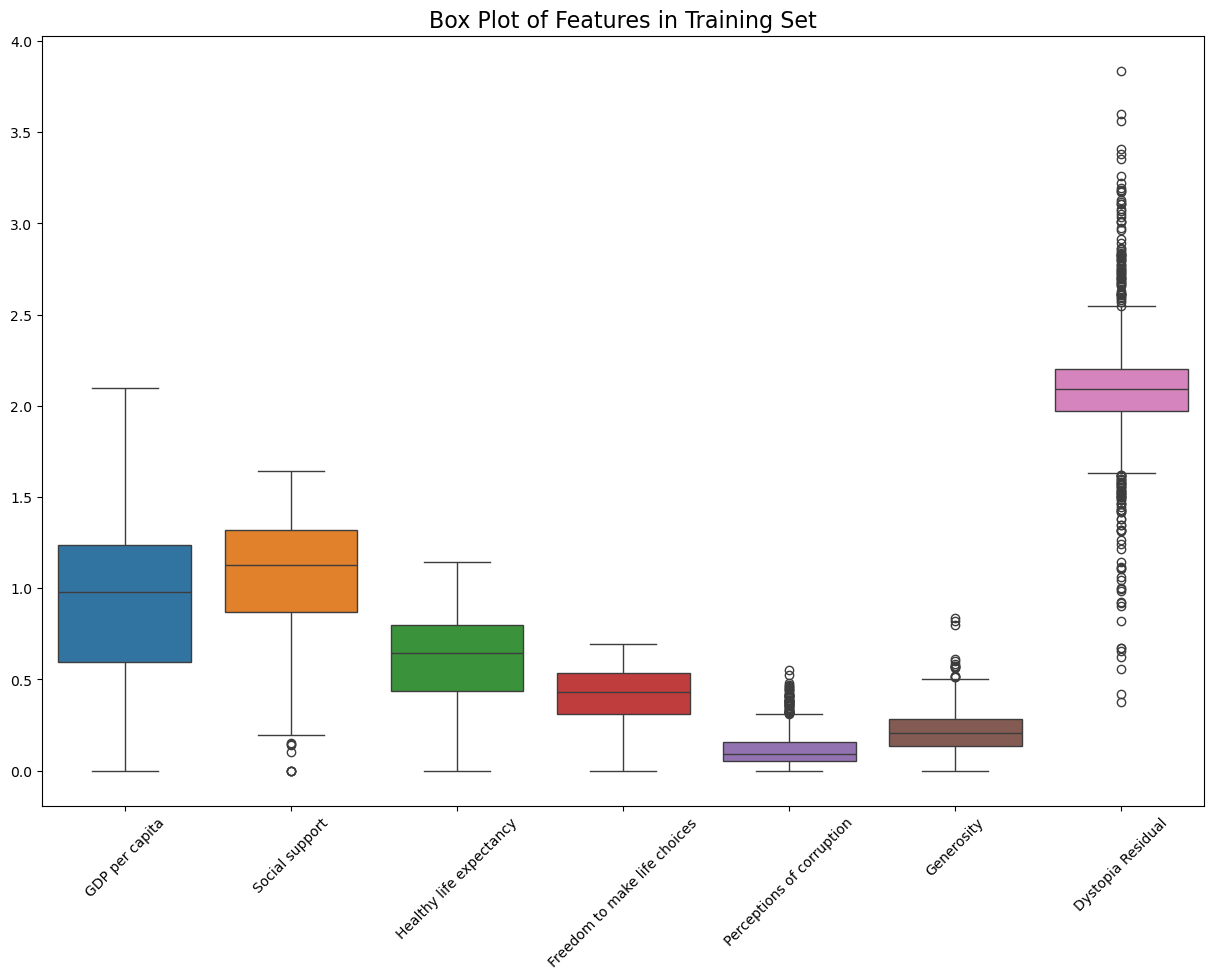

In [13]:
# Plot box plots to visualize outliers in the training set
plt.figure(figsize=(15,10))
sns.boxplot(data=X_train)
plt.title("Box Plot of Features in Training Set", fontsize=16)
plt.xticks(rotation=45)
plt.show()


### Correlation analysis with train set score and other features

In [14]:
# Combine training features with the target variable
train_data = X_train.copy()
train_data['Score'] = y_train.reset_index(drop=True)  # Add target variable to the DataFrame


In [15]:
# Calculate the correlation matrix
corr_matrix_train = train_data.corr()
score_corr = corr_matrix_train['Score'].sort_values(ascending=False)
print("Correlation of Features with Score:")
print(score_corr)


Correlation of Features with Score:
Score                           1.000000
Generosity                      0.047052
Dystopia Residual               0.034187
Social support                  0.007850
Freedom to make life choices   -0.028054
Perceptions of corruption      -0.032792
Healthy life expectancy        -0.039585
GDP per capita                 -0.064576
Name: Score, dtype: float64


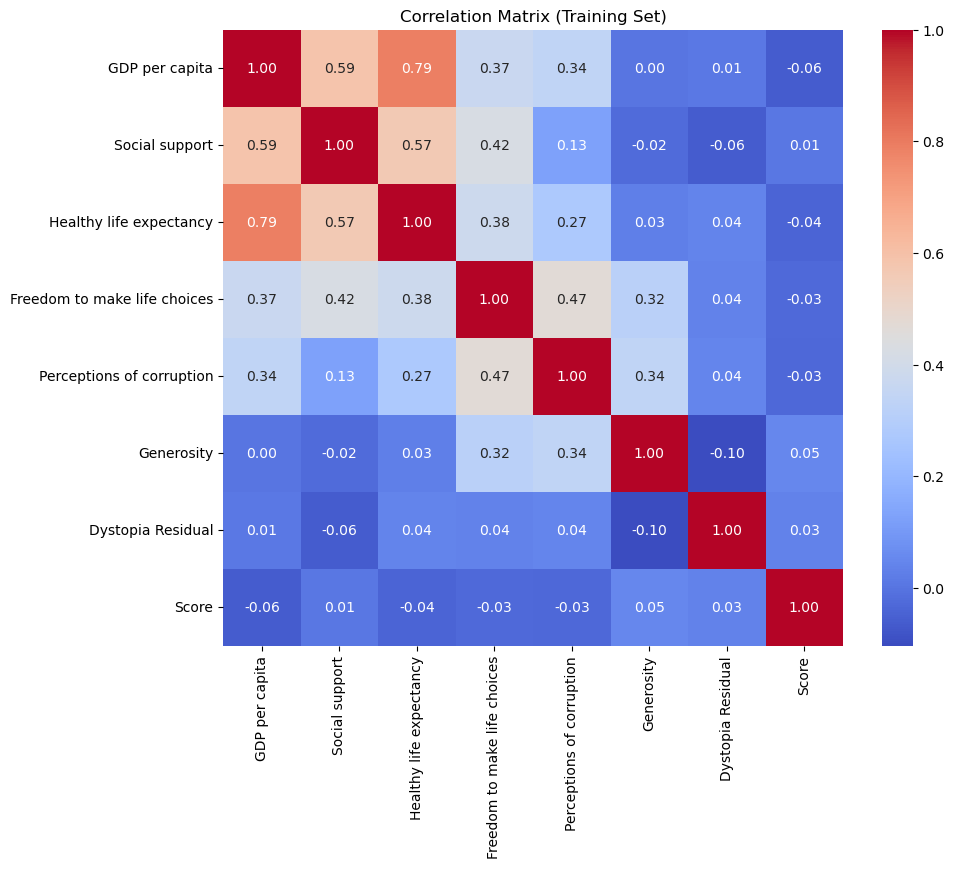

In [16]:
# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix_train, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Training Set)")
plt.show()


By observing the above numbers and the figure, we can see that the relation between target variable with the features are not strong enough to implement and train a model. So we are going to engineer some of the features to get a better model without biasing as well.

#### Adding ploynomial feature

In [17]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features of degree 2
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)

# Convert back to DataFrame for easier interpretation
feature_names = poly.get_feature_names_out(input_features=X_train.columns)
X_train_poly_df = pd.DataFrame(X_train_poly, columns=feature_names)

# Display the new feature set
print("New Feature Set with Polynomial Features:")
print(X_train_poly_df.head())


New Feature Set with Polynomial Features:
   GDP per capita  Social support  Healthy life expectancy  \
0         0.72100         0.74700                  0.48500   
1         1.01216         1.10614                  0.76649   
2         0.81217         0.87877                  0.47036   
3         1.14723         1.25745                  0.73128   
4         0.35700         1.09400                  0.24800   

   Freedom to make life choices  Perceptions of corruption  Generosity  \
0                       0.53900                    0.09300     0.17200   
1                       0.30587                    0.00872     0.11921   
2                       0.54854                    0.11757     0.21674   
3                       0.21342                    0.01031     0.02641   
4                       0.40600                    0.09900     0.13200   

   Dystopia Residual  GDP per capita^2  GDP per capita Social support  \
0            2.09464          0.519841                       0.5385

#### Scale the polynomial feature

In [18]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the polynomial features
X_train_poly_scaled = scaler.fit_transform(X_train_poly)

# Convert back to DataFrame
X_train_poly_scaled_df = pd.DataFrame(X_train_poly_scaled, columns=feature_names)

# Display the scaled features
print("Scaled Polynomial Feature Set:")
print(X_train_poly_scaled_df.head())


Scaled Polynomial Feature Set:
   GDP per capita  Social support  Healthy life expectancy  \
0       -0.459626       -1.017018                -0.501150   
1        0.244850        0.081466                 0.638996   
2       -0.239036       -0.613979                -0.560447   
3        0.571658        0.544270                 0.496381   
4       -1.340342        0.044334                -1.461093   

   Freedom to make life choices  Perceptions of corruption  Generosity  \
0                      0.822553                  -0.317103   -0.398504   
1                     -0.699790                  -1.109203   -0.821418   
2                      0.884850                  -0.086183   -0.040081   
3                     -1.303490                  -1.094259   -1.564862   
4                     -0.045939                  -0.260712   -0.718954   

   Dystopia Residual  GDP per capita^2  GDP per capita Social support  \
0          -0.000333         -0.660766                      -0.828391   
1    

#### Create an aggregate feature

In [19]:
# Example: Creating a Well-being Index by combining several features
# This is a simple example; you may adjust the weights based on your insights.
df_combined['Well-being Index'] = (
    0.4 * df_combined['GDP per capita'] +
    0.3 * df_combined['Social support'] +
    0.3 * df_combined['Healthy life expectancy']
)

# Display the updated DataFrame
print("Updated DataFrame with Well-being Index:")
print(df_combined[['GDP per capita', 'Social support', 'Healthy life expectancy', 'Well-being Index']].head())


Updated DataFrame with Well-being Index:
   GDP per capita  Social support  Healthy life expectancy  Well-being Index
0         1.39651         1.34951                  0.94143          1.245886
1         1.30232         1.40223                  0.94784          1.225949
2         1.32548         1.36058                  0.87464          1.200758
3         1.45900         1.33095                  0.88521          1.248448
4         1.32629         1.32261                  0.90563          1.198988


#### See the importance of the features by using random forest model

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Define target variable
y_train_final = y_train  # Original target

# Train a Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_poly_scaled, y_train_final)

# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame to view feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the feature importances
print("Feature Importances from Random Forest:")
print(feature_importance_df)


Feature Importances from Random Forest:
                                              Feature  Importance
13                   GDP per capita Dystopia Residual    0.587334
15             Social support Healthy life expectancy    0.111294
10        GDP per capita Freedom to make life choices    0.033942
19                   Social support Dystopia Residual    0.030878
24          Healthy life expectancy Dystopia Residual    0.029051
27            Freedom to make life choices Generosity    0.023628
16        Social support Freedom to make life choices    0.022660
28     Freedom to make life choices Dystopia Residual    0.019884
18                          Social support Generosity    0.018044
30               Perceptions of corruption Generosity    0.017953
21  Healthy life expectancy Freedom to make life c...    0.014063
8                       GDP per capita Social support    0.013446
9              GDP per capita Healthy life expectancy    0.010993
33                       Generosity 

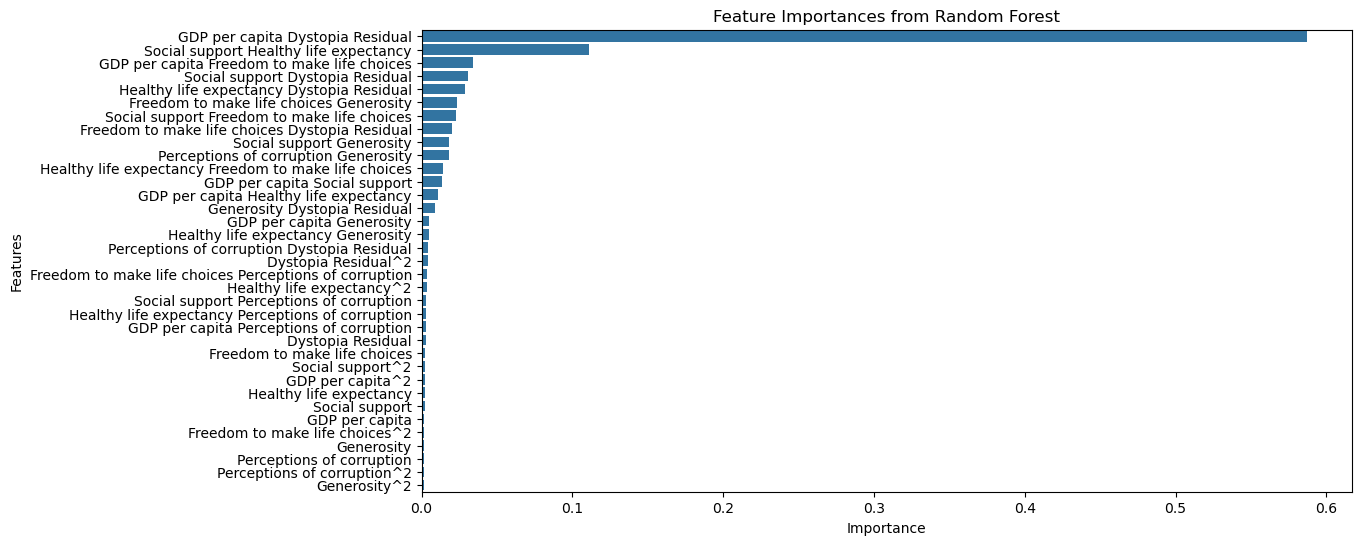

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


With above exploration we can see that som eof the features are dominant while some other features are not affecting very much. So now we can select only the features who have a significant affect to the final output.

#### Feature Selection

In [22]:
# Filter out features with low importance
threshold = 0.005
important_features = feature_importance_df[feature_importance_df['Importance'] > threshold]
print("Important Features:")
print(important_features)


Important Features:
                                              Feature  Importance
13                   GDP per capita Dystopia Residual    0.587334
15             Social support Healthy life expectancy    0.111294
10        GDP per capita Freedom to make life choices    0.033942
19                   Social support Dystopia Residual    0.030878
24          Healthy life expectancy Dystopia Residual    0.029051
27            Freedom to make life choices Generosity    0.023628
16        Social support Freedom to make life choices    0.022660
28     Freedom to make life choices Dystopia Residual    0.019884
18                          Social support Generosity    0.018044
30               Perceptions of corruption Generosity    0.017953
21  Healthy life expectancy Freedom to make life c...    0.014063
8                       GDP per capita Social support    0.013446
9              GDP per capita Healthy life expectancy    0.010993
33                       Generosity Dystopia Residual   

#  Model Implementation

### Liner Regression Model Implementation

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define the Linear Regression model
linear_model = LinearRegression()

# Fit the model using the scaled polynomial features
linear_model.fit(X_train_poly_scaled, y_train_final)

# Predict on the test set
X_test_poly = poly.transform(X_test)  # Transform the test set to polynomial features
X_test_poly_scaled = scaler.transform(X_test_poly)  # Scale the test set

# Make predictions
y_pred = linear_model.predict(X_test_poly_scaled)



### Random Forest Model Implementation

In [24]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Train the model on the original polynomial-scaled features
rf_model.fit(X_train_poly_scaled, y_train_final)

# Predict on the test set
rf_y_pred = rf_model.predict(X_test_poly_scaled)

#  Model Evaluation and Discussion

1. Model evaluation for linear regression model

Mean Squared Error: 0.12459458101666081
R-squared: 0.897569210668793


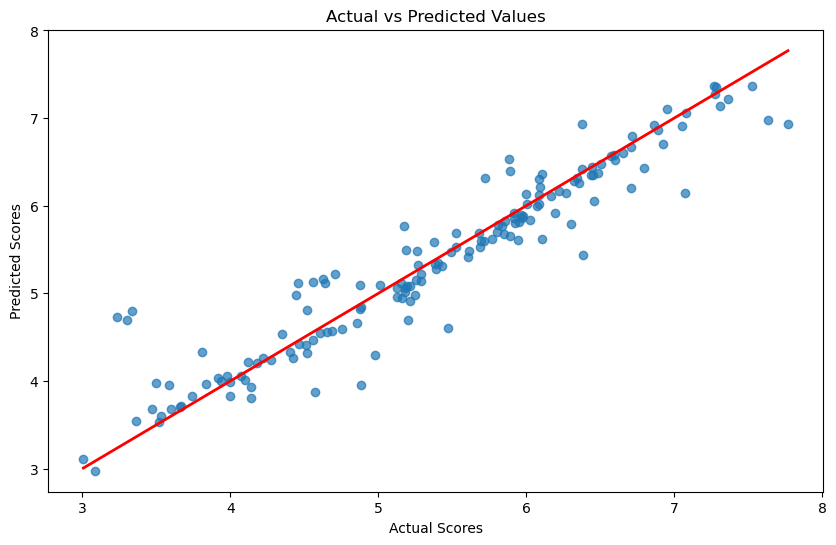

In [25]:
# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Visualizing the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Line of perfect prediction
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.show()

2. Model evaluation for Random forest model

Random Forest Mean Squared Error: 0.1105971414283977
Random Forest R-squared: 0.9090766837381872


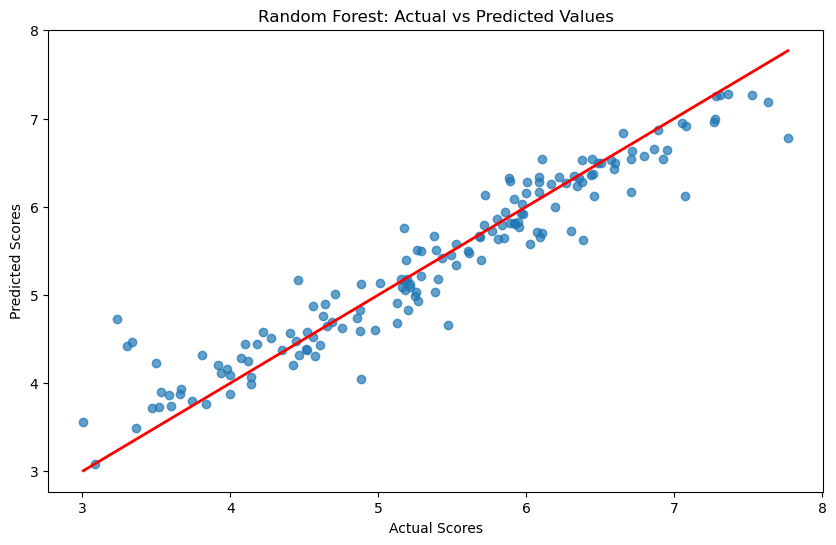

In [26]:
# Evaluate the Random Forest model
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

# Print the evaluation metrics for Random Forest
print("Random Forest Mean Squared Error:", rf_mse)
print("Random Forest R-squared:", rf_r2)

# Visualizing the predictions vs actual values for Random Forest model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Line of perfect prediction
plt.title('Random Forest: Actual vs Predicted Values')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.show()


For better results we are going to tune parameters of random forest regressor as below.

In [27]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='r2')
rf_search.fit(X_train_poly_scaled, y_train_final)

# Get the best hyperparameters
best_rf_params = rf_search.best_params_
print("Best Random Forest parameters:", best_rf_params)

# Refit with the best parameters
rf_tuned = RandomForestRegressor(**best_rf_params, random_state=42)
rf_tuned.fit(X_train_poly_scaled, y_train_final)

# Predict and evaluate the tuned Random Forest model
rf_tuned_y_pred = rf_tuned.predict(X_test_poly_scaled)
rf_tuned_mse = mean_squared_error(y_test, rf_tuned_y_pred)
rf_tuned_r2 = r2_score(y_test, rf_tuned_y_pred)

print("Tuned Random Forest Mean Squared Error:", rf_tuned_mse)
print("Tuned Random Forest R-squared:", rf_tuned_r2)


Best Random Forest parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Tuned Random Forest Mean Squared Error: 0.1107458477567103
Tuned Random Forest R-squared: 0.908954430374812


But we can see that the tuned parameters of random forest didn't gave a better results than previous one.

# Conclusion

In this project, we developed two models—**Linear Regression** and **Random Forest** to predict the World Happiness Score using various contributing factors. We evaluated both models using the **Mean Squared Error (MSE)** and **R-squared (R²)** as the key performance metrics.

## Linear Regression Model

- The Linear Regression model achieved the following results:

    - **Mean Squared Error (MSE):** 0.1246
    - **R-squared (R²):** 0.8976

- The MSE value of 0.1246 indicates that the average squared difference between the predicted and actual happiness scores is relatively small.
- The R² value of 0.8976 suggests that approximately 90% of the variance in the happiness score is explained by the model, which is a good level of accuracy for a linear model.
- However, being a simple linear model, it assumes a linear relationship between the features and the target variable, which may limit its ability to capture complex patterns in the data.

- Below is a plot comparing the actual happiness scores to the predicted values from the Linear Regression model:

![Linear Regression Plot](./linear_regression_plot.png)


- The red line represents the perfect prediction line.
- We can see that while most of the data points are close to this line, there are some deviations, particularly at the extremes, indicating that the model does not capture some of the non-linear relationships in the data.

## Random Forest Model

- The Random Forest model, which is a more complex and flexible ensemble method, yielded better results compared to the Linear Regression model:

    - **Random Forest Mean Squared Error (MSE):** 0.1106
    - **Random Forest R-squared (R²):** 0.9091

- This model shows an improvement in both MSE and R² compared to the Linear Regression model, indicating that it captures the relationships between features and happiness scores more effectively.
- The lower MSE and higher R² reflect a better fit to the data.
- The Random Forest model, being non-linear and able to handle complex feature interactions, explains around 91% of the variance in the happiness score.

- Below is the comparison between actual and predicted values for the Random Forest model:

![Random Forest Plot](./random_forest_plot.png)

- Similar to the Linear Regression plot, the red line represents the line of perfect prediction.
- In this case, more points are aligned along the red line compared to the Linear Regression model, confirming a better fit.

## Tuned Random Forest Model

- To further improve the performance of the Random Forest model, we performed **GridSearchCV** for hyperparameter tuning. The optimal hyperparameters found were:

    - `n_estimators`: 200
    - `max_depth`: 10
    - `min_samples_split`: 2
    - `min_samples_leaf`: 1

- The tuned Random Forest model achieved the following performance:

    - **Tuned Random Forest Mean Squared Error (MSE):** 0.1107
    - **Tuned Random Forest R-squared (R²):** 0.9090

- Interestingly, the tuned Random Forest model did not show a significant improvement over the default Random Forest model.
- The slight difference in MSE (0.1106 vs. 0.1107) and R² (0.9091 vs. 0.9090) suggests that the original Random Forest model was already close to optimal.
- While tuning helped refine the model's parameters, the gains in performance were minimal.

## Final Comparison

- The **Linear Regression** model provides a good baseline with **90% variance explained (R² = 0.8976)**, but it struggles with capturing complex relationships in the data.
- The **Random Forest** model, with **91% variance explained (R² = 0.9091)** and a lower MSE, significantly outperforms Linear Regression, especially in handling non-linearities and interactions between features.
- **Hyperparameter tuning** in the Random Forest model showed minimal improvement, indicating that the default Random Forest was already quite effective.

## Conclusion Summary

- Both models performed well in predicting the World Happiness Score.
- However, **Random Forest** proved to be the superior model with a better fit, likely due to its ability to handle more complex data patterns.
- The small performance gap between the tuned and untuned Random Forest models also suggests that the model's default parameters were robust for this dataset.
- Therefore, for future predictions and applications, Random Forest is the recommended model, especially when the aim is to capture the complex relationships between happiness factors and overall scores.


#  References

- https://www.sciencedirect.com/science/article/abs/pii/B9780122050503500087
- https://www.researchgate.net/publication/30529548_Happiness_Lessons_From_A_New_Science
- https://www.wellbeingintlstudiesrepository.org/hw_happiness/1/
